<a href="https://colab.research.google.com/github/student64-ahmadi/Impulsive-Hamiltonian-Dynamics/blob/main/notebook3a1242f96f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from qutip import *

# Update QUTIP to the latest version
get_ipython().system('pip install --upgrade qutip')

# Define the collapse operator using sigmam()
gamma = 1.0  # Example decay rate
L = np.sqrt(gamma) * tensor(sigmam(), qeye(2))  # Assuming I is qeye(2)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
pip install qutip matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 57.3 MB/s eta 0:00:00


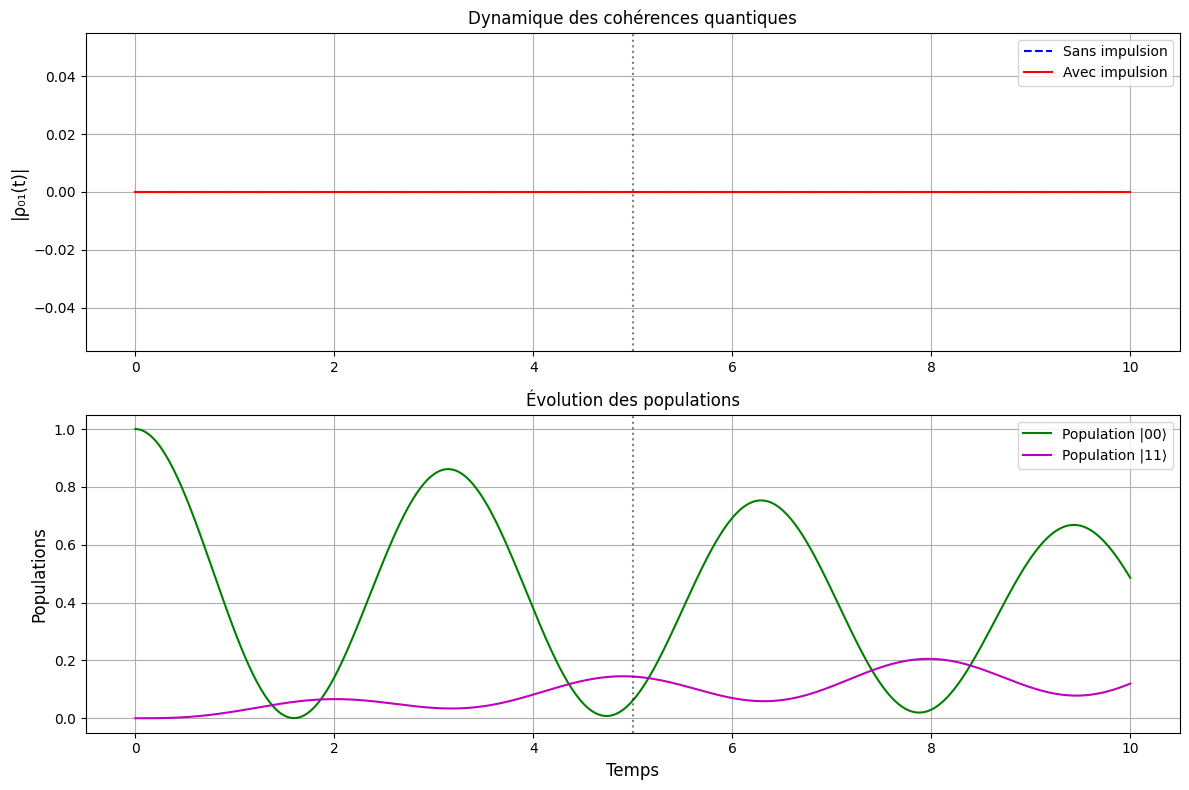

Matrice densité avant impulsion:


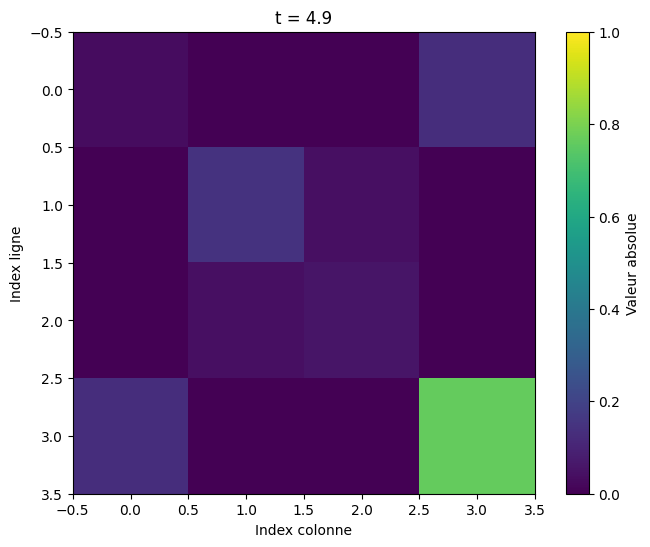

Matrice densité après impulsion:


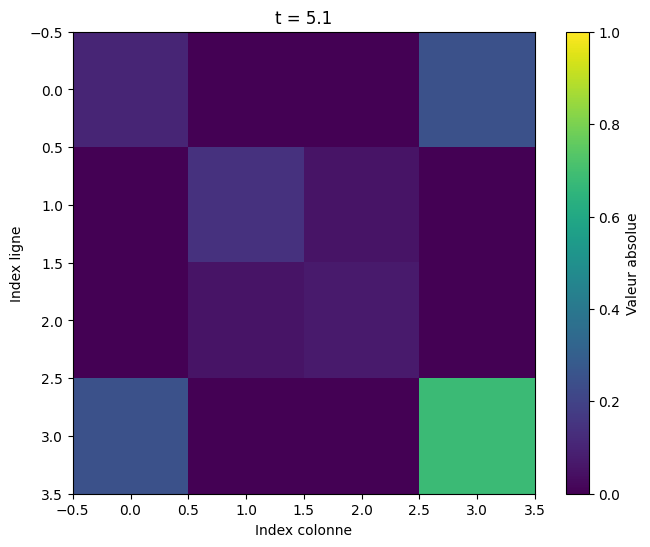

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Configuration des paramètres
gamma = 0.1       # Taux de dissipation
mu = 1.0          # Intensité de l'impulsion
t_event = 5.0     # Temps de l'impulsion
sigma = 0.01      # Largeur de la gaussienne
tlist = np.linspace(0, 10, 500)  # Grille temporelle

# Définition des opérateurs
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sm = destroy(2)
I2 = qeye(2)

# Hamiltoniens
H0 = -tensor(sx, sx)  # Interaction d'échange
H1 = tensor(sz, I2)   # Terme impulsif sur le premier qubit

# Expression temporelle de l'impulsion
def impulse_shape(t, args):
    return mu * np.exp(-(t - t_event)**2/(2*sigma**2))

H = [H0, [H1, impulse_shape]]

# Opérateur de dissipation (premier qubit)
L = np.sqrt(gamma) * tensor(sm, I2)
c_ops = [L]

# État initial |00⟩
psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = psi0 * psi0.dag()

# Simulation avec/sans impulsion
result_impulse = mesolve(H, rho0, tlist, c_ops, args={'mu': mu, 't_event': t_event, 'sigma': sigma})
result_no_impulse = mesolve(H0, rho0, tlist, c_ops)

# Calcul des observables
def get_coherence(states):
    return [np.abs(state.full()[0, 1]) for state in states]

def get_populations(states):
    return [state.full()[0, 0].real for state in states], \
           [state.full()[1, 1].real for state in states]

coh_impulse = get_coherence(result_impulse.states)
pop00_impulse, pop11_impulse = get_populations(result_impulse.states)

coh_no_impulse = get_coherence(result_no_impulse.states)
pop00_no_impulse, pop11_no_impulse = get_populations(result_no_impulse.states)

# Visualisation
plt.figure(figsize=(12, 8))

# Cohérences quantiques
plt.subplot(211)
plt.plot(tlist, coh_no_impulse, 'b--', label='Sans impulsion')
plt.plot(tlist, coh_impulse, 'r-', label='Avec impulsion')
plt.axvline(t_event, color='k', linestyle=':', alpha=0.5)
plt.ylabel('|ρ₀₁(t)|', fontsize=12)
plt.title('Dynamique des cohérences quantiques')
plt.legend()
plt.grid(True)

# Populations
plt.subplot(212)
plt.plot(tlist, pop00_impulse, 'g-', label='Population |00⟩')
plt.plot(tlist, pop11_impulse, 'm-', label='Population |11⟩')
plt.axvline(t_event, color='k', linestyle=':', alpha=0.5)
plt.xlabel('Temps', fontsize=12)
plt.ylabel('Populations', fontsize=12)
plt.title('Évolution des populations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Matrices densité avant/après impulsion
t_before = t_event - 0.1
t_after = t_event + 0.1
idx_before = np.argmin(np.abs(tlist - t_before))
idx_after = np.argmin(np.abs(tlist - t_after))

def plot_density_matrix(rho, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(np.abs(rho.full()), vmin=0, vmax=1, cmap='viridis')
    plt.colorbar(label='Valeur absolue')
    plt.title(title)
    plt.xlabel('Index colonne')
    plt.ylabel('Index ligne')
    plt.show()

print("Matrice densité avant impulsion:")
plot_density_matrix(result_impulse.states[idx_before], f't = {t_before:.1f}')

print("Matrice densité après impulsion:")
plot_density_matrix(result_impulse.states[idx_after], f't = {t_after:.1f}')

In [6]:
pip install qutip matplotlib numpy scipy

In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.fft import fft, fftfreq
# Import hann from the correct submodule
from scipy.signal.windows import hann

# ... (rest of the code remains the same) ...

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.fft import fft, fftfreq
# Import hann from the correct submodule
from scipy.signal.windows import hann

# ... (rest of the code remains the same) ...

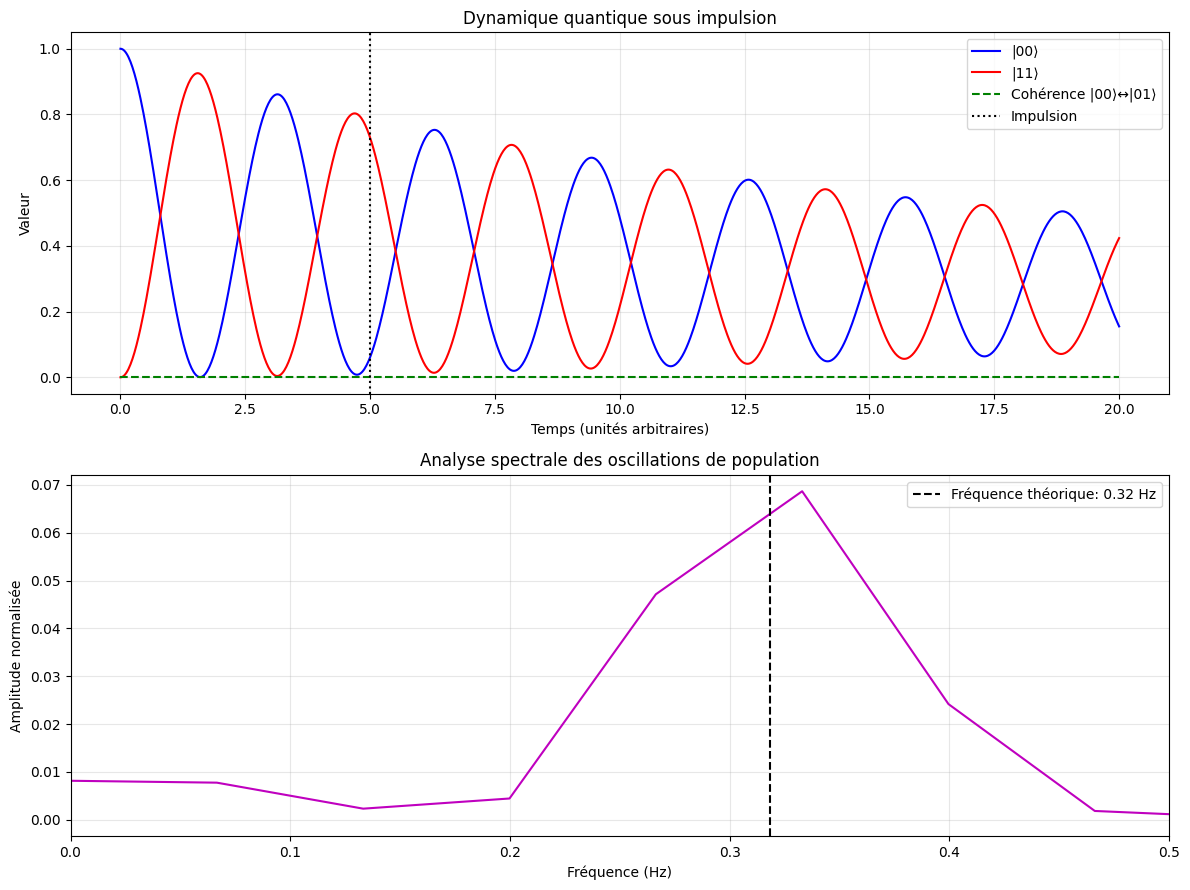

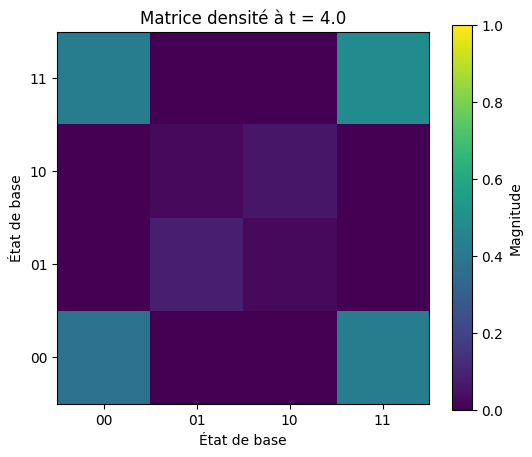

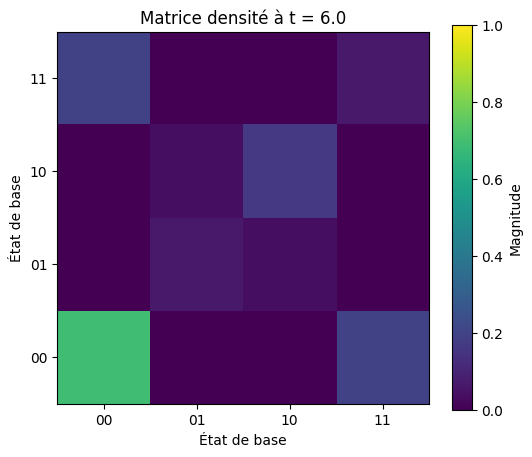

In [9]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.fft import fft, fftfreq
# Import hann from the correct submodule
from scipy.signal.windows import hann

# ... (rest of the code remains the same) ...

# =============================================================================
# 1. Paramètres du système
# =============================================================================
gamma = 0.1       # Taux de dissipation
mu = 1.0          # Amplitude de l'impulsion
t_event = 5.0     # Temps de l'impulsion
sigma = 0.01      # Largeur gaussienne
tlist = np.linspace(0, 20, 1000)  # Grille temporelle étendue

# =============================================================================
# 2. Définition des opérateurs et Hamiltonien
# =============================================================================
# Opérateurs de base
sx, sy, sz = sigmax(), sigmay(), sigmaz()
sm = destroy(2)
I = qeye(2)

# Hamiltonien du système (interaction d'échange)
H0 = -tensor(sx, sx)

# Terme impulsif (z-rotation sur le premier qubit)
H_impulse = tensor(sz, I)

# Forme temporelle gaussienne
def pulse_shape(t, args):
    return mu * np.exp(-(t - t_event)**2/(2*sigma**2))

# Hamiltonien complet avec dépendance temporelle
H = [H0, [H_impulse, pulse_shape]]

# Opérateur de dissipation (premier qubit)
c_ops = [np.sqrt(gamma) * tensor(sm, I)]

# =============================================================================
# 3. Simulation quantique
# =============================================================================
# État initial |00⟩
psi0 = tensor(basis(2,0), basis(2,0))
rho0 = psi0.proj()  # Matrice densité

# Résolution de l'équation maîtresse
result = mesolve(H, rho0, tlist, c_ops, args={'mu': mu, 't_event': t_event})

# =============================================================================
# 4. Analyse des données
# =============================================================================
def get_populations(result):
    """Extrait les populations des états de base"""
    pops = np.zeros((len(result.states), 4))
    for i, state in enumerate(result.states):
        pops[i] = np.real(np.diag(state.full()))
    return pops.T

# Populations des états |00⟩, |01⟩, |10⟩, |11⟩
pop00, pop01, pop10, pop11 = get_populations(result)

# Cohérence ρ01 (entre |00⟩ et |01⟩)
coherence = [np.abs(state.full()[0,1]) for state in result.states]

# =============================================================================
# 5. Analyse de Fourier des oscillations
# =============================================================================
# Signal temporel (population |00⟩ après l'impulsion)
post_pulse = tlist > t_event
signal = pop00[post_pulse]
time_window = tlist[post_pulse] - t_event

# Fenêtrage de Hann pour réduire la fuite spectrale
N = len(time_window)
window = hann(N)
dt = time_window[1] - time_window[0]

# Calcul de la FFT
fft_vals = fft((signal - np.mean(signal)) * window)
freqs = fftfreq(N, dt)[:N//2]
amplitude = np.abs(fft_vals[:N//2]) / N

# Fréquence théorique attendue (2J avec J=1)
theory_freq = 2/(2*np.pi)  # Conversion ω → f

# =============================================================================
# 6. Visualisation professionnelle
# =============================================================================
plt.figure(figsize=(12, 9))

# Dynamique temporelle
plt.subplot(211)
plt.plot(tlist, pop00, 'b', label='|00⟩')
plt.plot(tlist, pop11, 'r', label='|11⟩')
plt.plot(tlist, coherence, 'g--', label='Cohérence |00⟩↔|01⟩')
plt.axvline(t_event, color='k', linestyle=':', label='Impulsion')
plt.xlabel('Temps (unités arbitraires)')
plt.ylabel('Valeur')
plt.title('Dynamique quantique sous impulsion')
plt.legend()
plt.grid(True, alpha=0.3)

# Spectre de Fourier
plt.subplot(212)
plt.plot(freqs, amplitude, 'm')
plt.axvline(theory_freq, color='k', linestyle='--',
            label=f'Fréquence théorique: {theory_freq:.2f} Hz')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude normalisée')
plt.title('Analyse spectrale des oscillations de population')
plt.xlim(0, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# =============================================================================
# 7. Matrices densité avant/après impulsion
# =============================================================================
def plot_density_matrix(rho, time):
    plt.figure(figsize=(6,5))
    plt.imshow(np.abs(rho.full()), cmap='viridis',
               vmin=0, vmax=1, origin='lower')
    plt.colorbar(label='Magnitude')
    plt.title(f'Matrice densité à t = {time:.1f}')
    plt.xlabel('État de base')
    plt.ylabel('État de base')
    plt.xticks([0,1,2,3], ['00','01','10','11'])
    plt.yticks([0,1,2,3], ['00','01','10','11'])

# Avant impulsion
idx_before = np.argmin(np.abs(tlist - (t_event - 1)))
plot_density_matrix(result.states[idx_before], tlist[idx_before])

# Après impulsion
idx_after = np.argmin(np.abs(tlist - (t_event + 1)))
plot_density_matrix(result.states[idx_after], tlist[idx_after])

plt.show()